<a href="https://colab.research.google.com/github/kbalaji4/LAC/blob/Lunar_Rock_Detection/Lunar_Rock_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Dec 24 17:10:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 17075 (delta 18), reused 5 (delta 5), pack-reused 17049 (from 3)
Receiving objects: 100% (17075/17075), 15.70 MiB | 7.33 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.


In [3]:
# install dependencies as necessary
%cd /content/yolov5/
!pip install -r requirements.txt
!pip uninstall wandb -qy # deprecated dependency
import torch
from IPython.display import Image, clear_output # to display images
#rined Setup complete. Using torch 85 85' & (torch. _version_, torch. cuda.get_device properties (0) if torch. cuda

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 23.7 MB/s eta 0:00:00


In [4]:
!pip install -q roboflow==1.1.48

from roboflow import Roboflow
rf = Roboflow(api_key="KRAjwQPxQyBxkyuLH19Y")
project = rf.workspace("arthurs-images").project("lunar-obstacle-detection")
version = project.version(3)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lunar-Obstacle-Detection-3 in yolov5pytorch:: 100%|██████████| 972/972 [00:00<00:00, 7001.50it/s]


In [5]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 32 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5m.pt --name yolov5m_results --cache

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2024-12-24 17:18:18.266723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-24 17:18:18.284107: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-24 17:18:18.289861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=

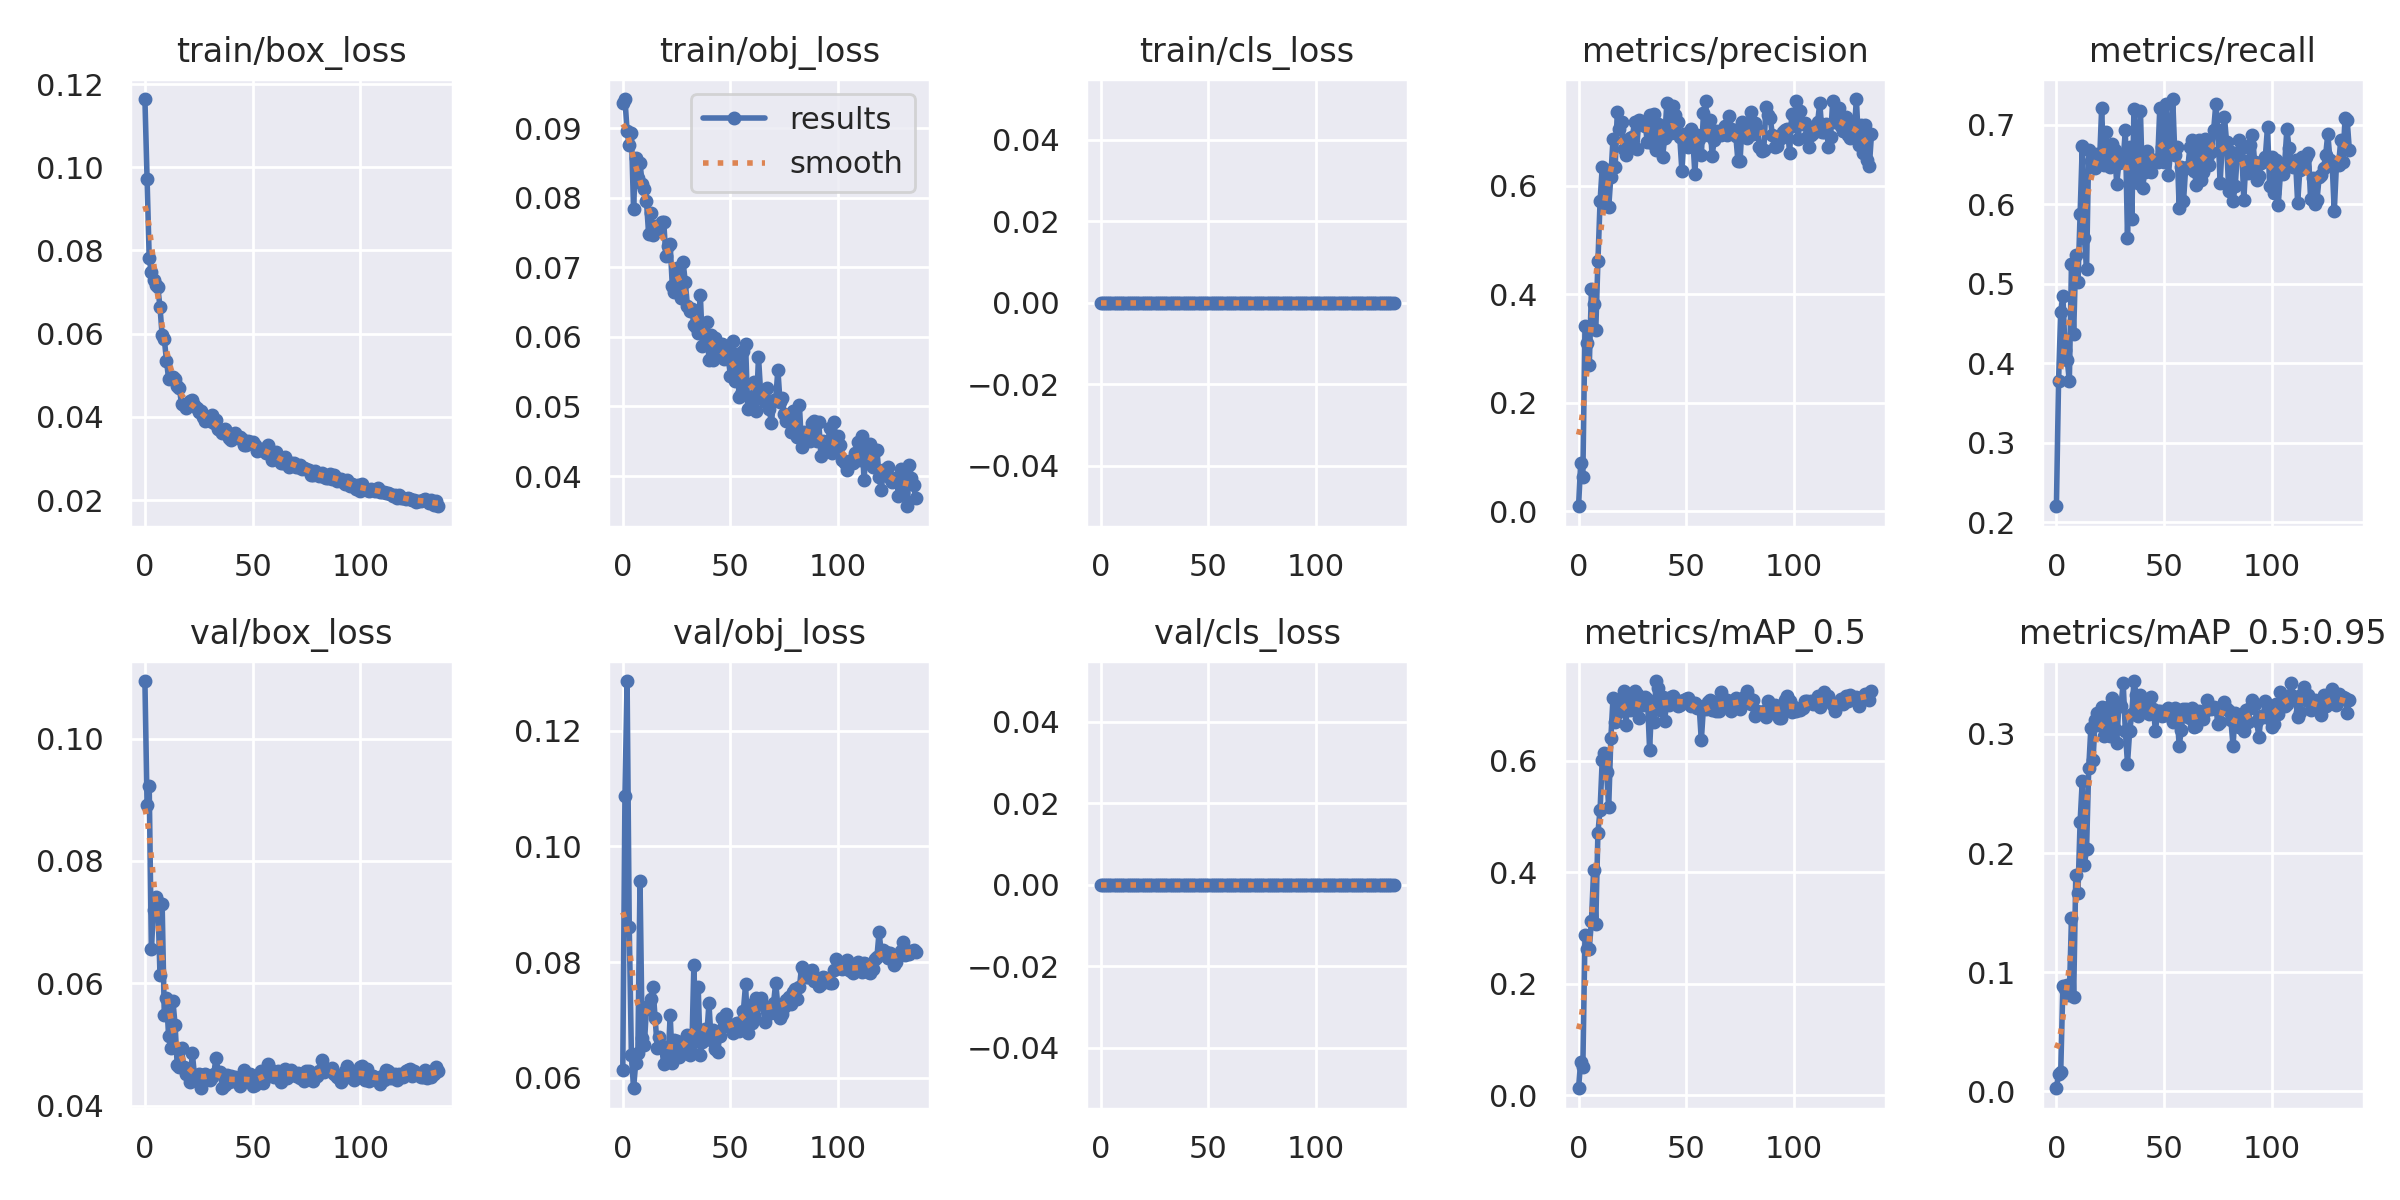

In [7]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5m_results/results.png', width=1000)

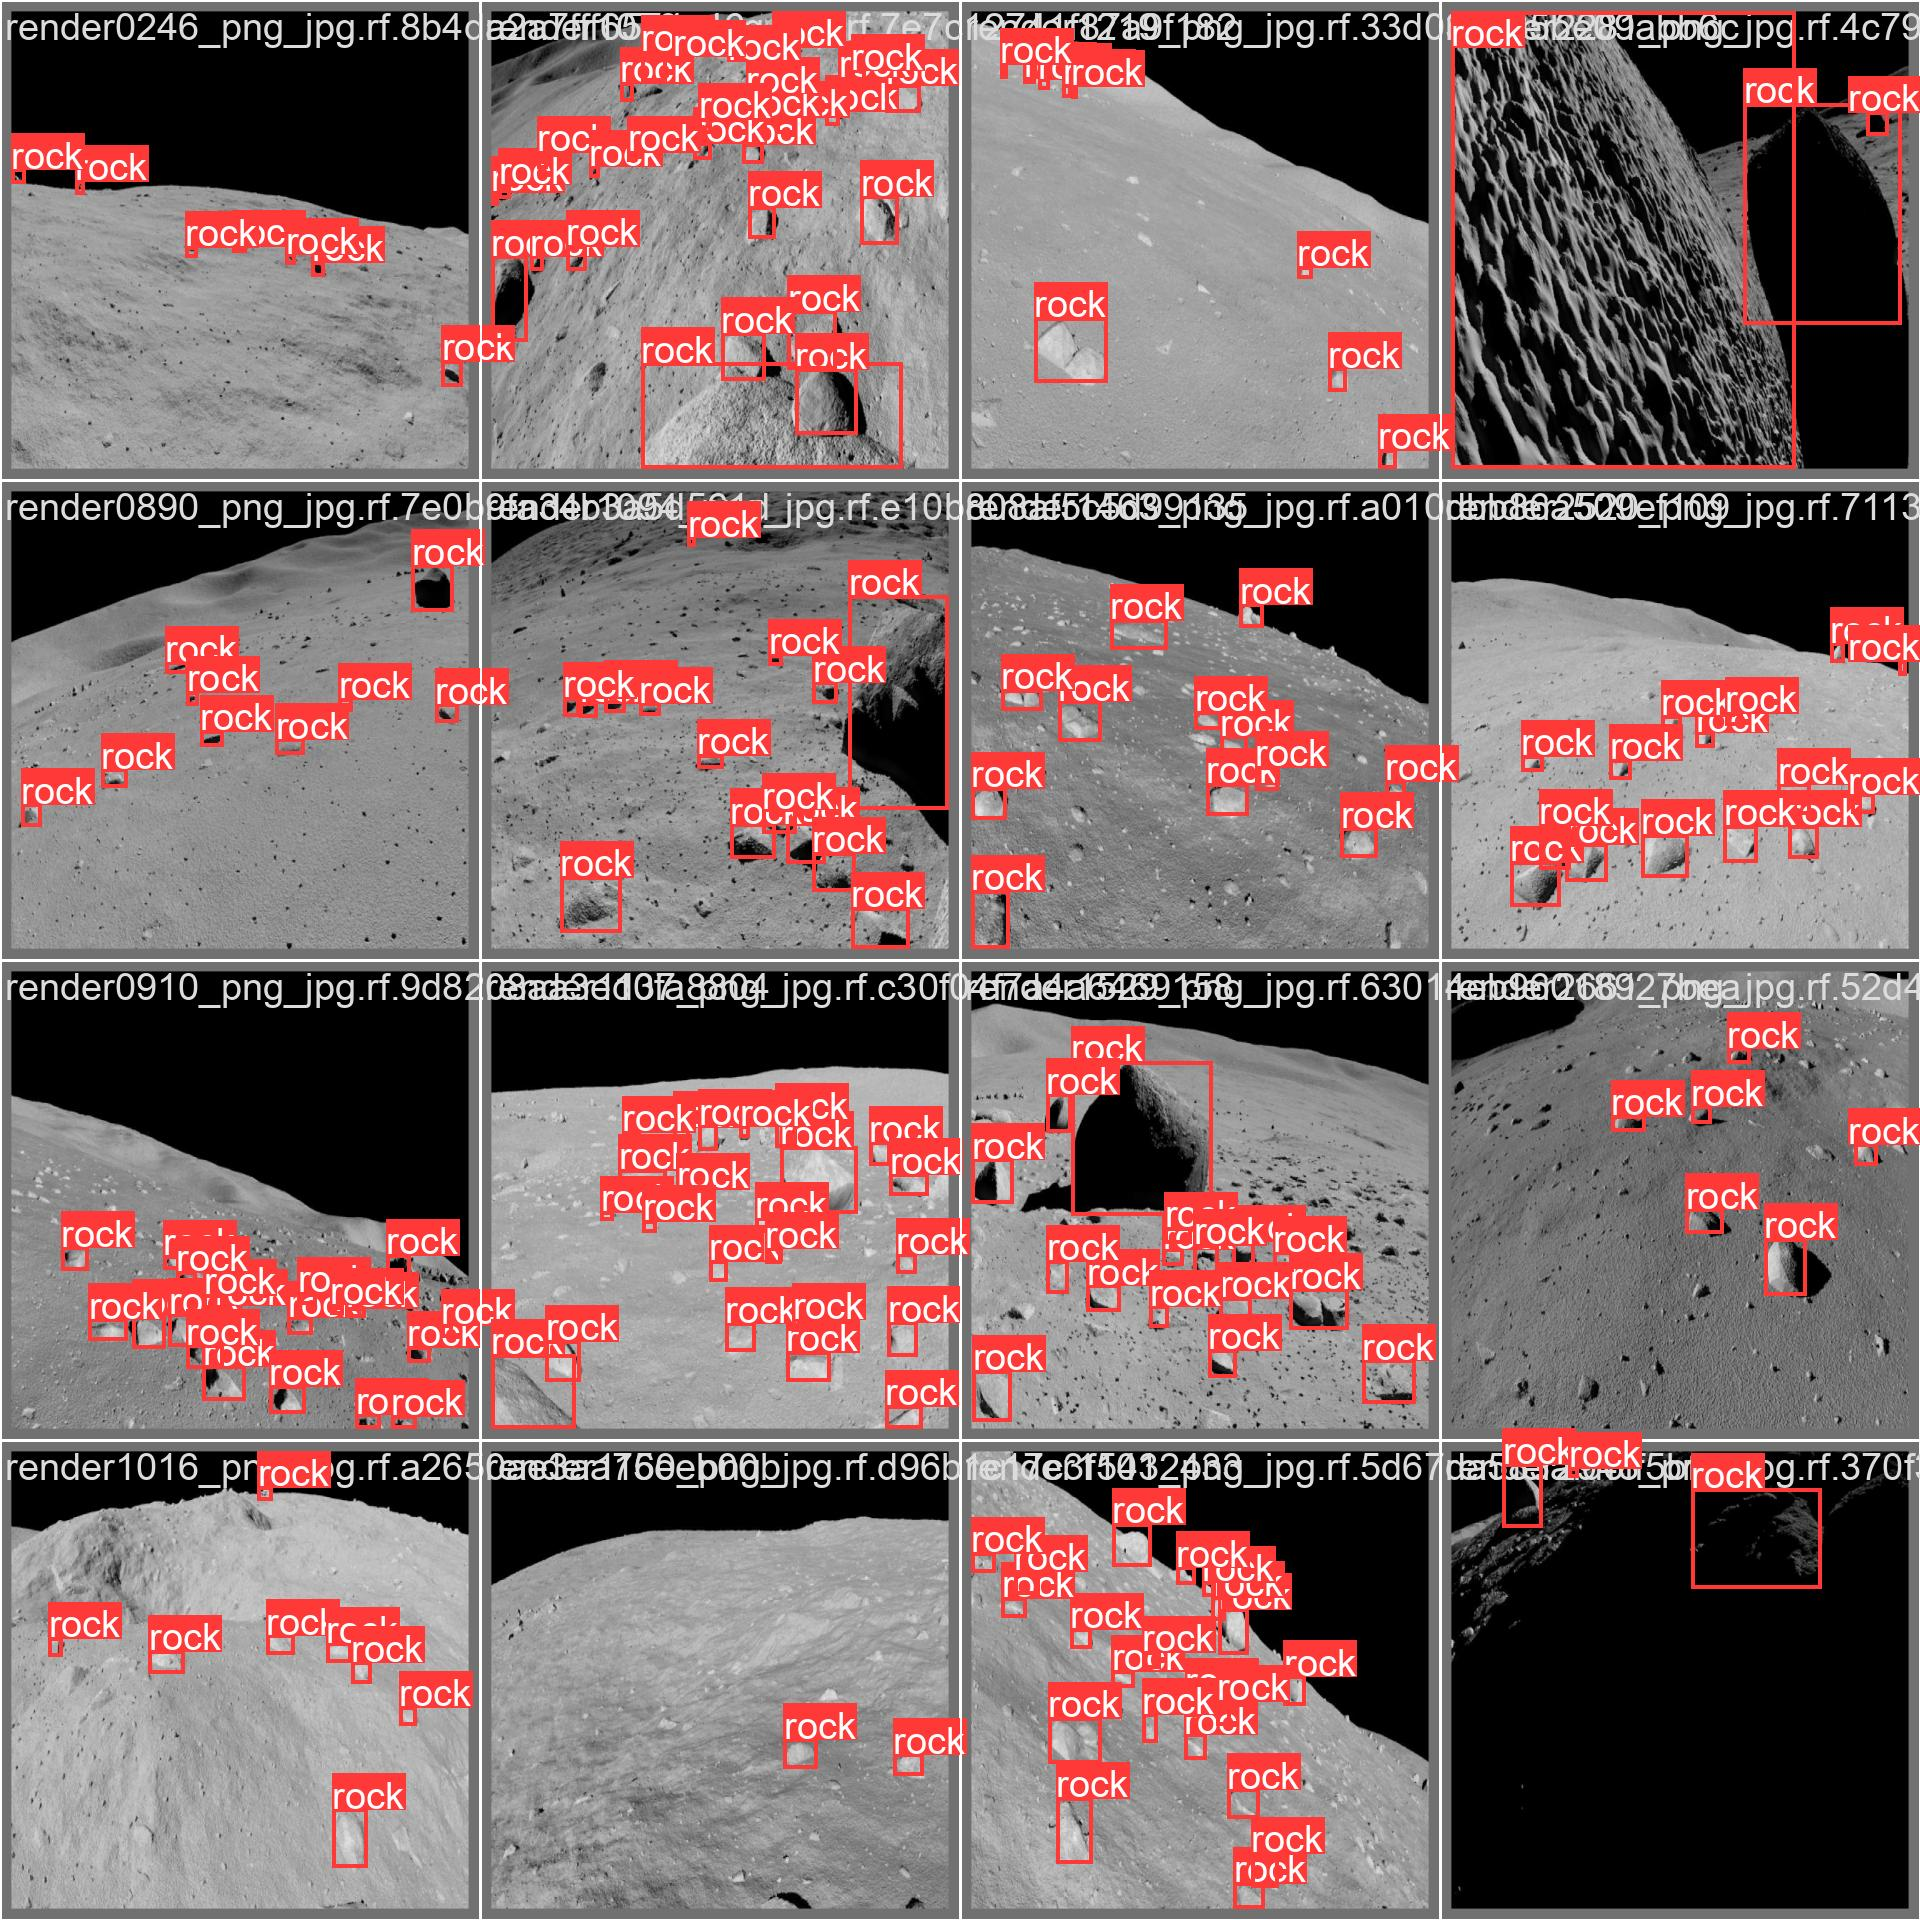

In [9]:
Image(filename='/content/yolov5/runs/train/yolov5m_results/val_batch0_labels.jpg', width=900)

In [11]:
!python detect.py --weights yolov5x.pt t --img 640 --source {dataset.location}/data.yaml

2024-12-24 08:29:51.817874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-24 08:29:51.836373: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-24 08:29:51.841887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1735028994.436756    2906 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735028995.216950    2906 cuda_executor.cc:1015] succ